# Projectile Motion

> Projectile motion is a form of motion experienced by an object or particle (a projectile) that is projected in a gravitational field, such as from Earth's surface, and moves along a curved path under the action of gravity only. 
>-- <cite>[wikipedia](https://en.wikipedia.org/wiki/Projectile_motion)</cite>

The projectile path of a point like object with mass `m` can be determine by Newton's laws of motion.
$$
    a_x = \frac{d^2 x}{dt^2} = 0 \\
    a_y = \frac{d^2 y}{dt^2} = -g 
$$

Here I have decided to use numerical algorithms directly for differentiation and integrations to calculate the projectile path (without sympy). First Let define the constants and inital values.
$$
    g = gravitaional\ acceleration = 9.81\ ms^{-1} \\
    v_0 = initial\ velocity \\
    r_0 = initial\ displacement \\
    \alpha = initial\ angle\ relative\ to\ positive\ x\ direction
$$

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

g = 9.81  # gravitational acceleration (m/s^2)
v0 = 70  # initial velocity (m/s)
r0 = 0  # inital displacement (m)
alpha = np.deg2rad(60)  # initial angle relative to positive x direction
h = 0.5  # step size in time

t = np.arange(0, 13, h)  # define time range as a discreate array
x = np.zeros(t.shape[0])  # define displacemnt array to store displacement in x direction for each time step
y = np.zeros(t.shape[0])  # define displacemnt array to store displacement in x direction for each time step

Now let's define Python functions for accelerations in x and y positive directions. In these functions parameter "t" is defined only for the sake of completeness even if it is unused.

In [89]:
def func_ax(t: float) -> float:
    return 0


def func_ay(t: float) -> float:
    return -g

Now let's find velocity in x and y direction seperately by using second order Runge-Kutta method.

In [90]:
def runge_kutta2(h: float, f: Callable, y0: float, x: np.ndarray) -> np.ndarray:
    """function to implement second order Runge-Kutta method (Modified Euler's method)

    :param h: step size of the partition of the domain of f
    :type h: float
    :param f: python function which represent the mathematical function f
    :type f: Callable
    :param y0: initial value y0 = f(x0)
    :type y0: float
    :param x: patition of the domain of f which has step size h
    :type x: np.ndarray
    :return: set of values of f(x) for each partion point in the partition
    :rtype: np.ndarray
    """
    y = np.zeros_like(x)
    y[0] = y0
    for i in range(t.shape[0] - 1):
        k1 = h * f(x[i])
        k2 = h * f(x[i + 1])
        y[i + 1] = y[i] + (k1 + k2) / 2
    return y


v_x = runge_kutta2(h, func_ax, v0 * np.cos(alpha), t)  # velocity array to store velocity in x direction for each time step
v_y = runge_kutta2(h, func_ay, v0 * np.sin(alpha), t)  # velocity array to store velocity in y direction for each time step

Let's plot the velocity vs time.

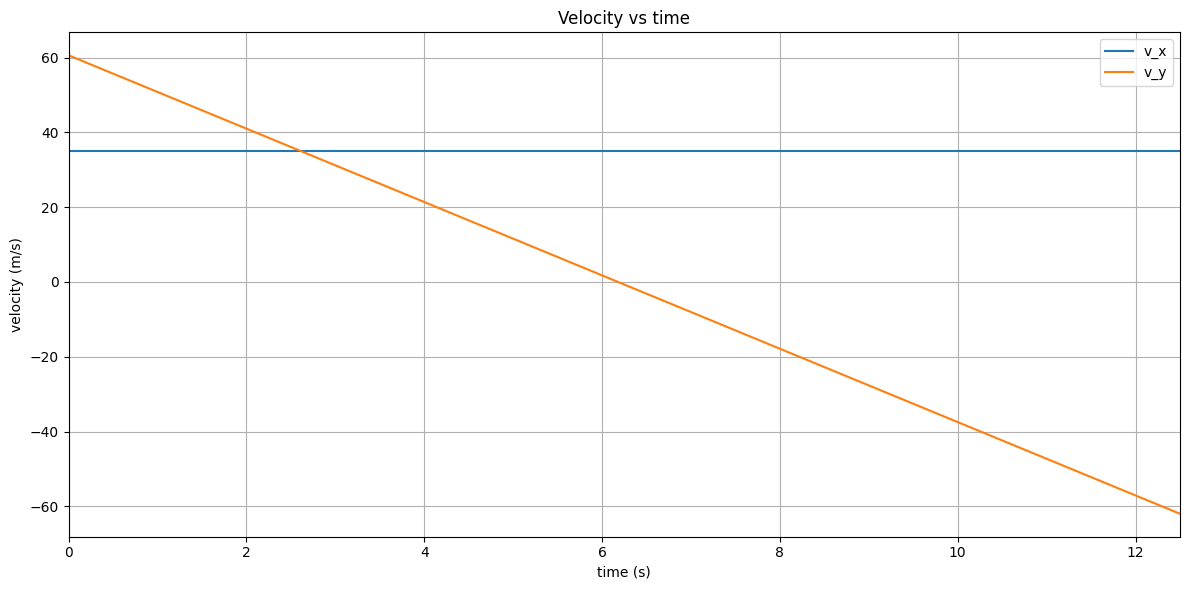

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(t, v_x, label="v_x")
plt.xlim((0, t[-1]))
plt.xlabel("time (s)")
plt.plot(t, v_y, label="v_y")
plt.ylabel("velocity (m/s)")
plt.title("Velocity vs time")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Based on velocities in x and y directions, using trapazoidal rule displacement in x an y directions can be determined.

In [92]:
def trapazoidal(h: float, y: np.ndarray, integrate_y0: float) -> np.ndarray:
    """function for trapazoidal rule

    :param h: step size of the partion of the independant variable's domain
    :type h: float
    :param y: set of y values
    :type y: np.ndarray
    :param integrate_y0: initial y value such that y0 = f(x0)
    :type integrate_y0: float
    :return: set of values after numerical approximation for integral
    :rtype: np.ndarray
    """
    integrate_y = np.zeros_like(y)
    integrate_y[0] = integrate_y0
    for i in range(y.shape[0] - 1):
        k = h * (y[i] + y[i + 1]) / 2
        integrate_y[i + 1] = integrate_y[i] + k
    return integrate_y


x = trapazoidal(h, v_x, 0)
y = trapazoidal(h, v_y, 0)
R = np.sqrt(x**2 + y**2)

Let's plot Displacement vs time

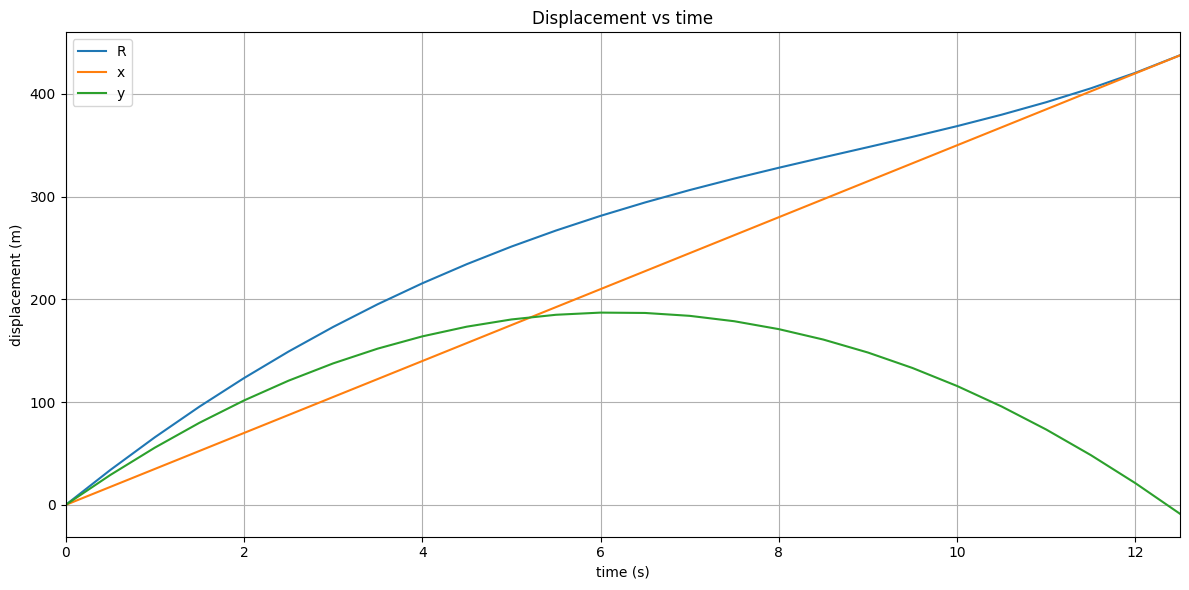

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(t, R, label="R")
plt.plot(t, x, label="x")
plt.plot(t, y, label="y")
plt.title("Displacement vs time")
plt.xlabel("time (s)")
plt.ylabel("displacement (m)")
plt.legend()
plt.xlim((0, t[-1]))
plt.grid()
plt.tight_layout()
plt.show()